<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Machine-learning-handson/blob/main/Transforming_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols


In [21]:
fish = pd.read_csv('/content/fish.csv')
print(fish.info)

<bound method DataFrame.info of     species  mass_g  length_cm
0     Bream   242.0       23.2
1     Bream   290.0       24.0
2     Bream   340.0       23.9
3     Bream   363.0       26.3
4     Bream   430.0       26.5
..      ...     ...        ...
123    Pike   950.0       48.3
124    Pike  1250.0       52.0
125    Pike  1600.0       56.0
126    Pike  1550.0       56.0
127    Pike  1650.0       59.0

[128 rows x 3 columns]>


In [22]:
perch = fish[fish['species']=='Perch']
print(perch.head())

   species  mass_g  length_cm
55   Perch     5.9        7.5
56   Perch    32.0       12.5
57   Perch    40.0       13.8
58   Perch    51.5       15.0
59   Perch    70.0       15.7


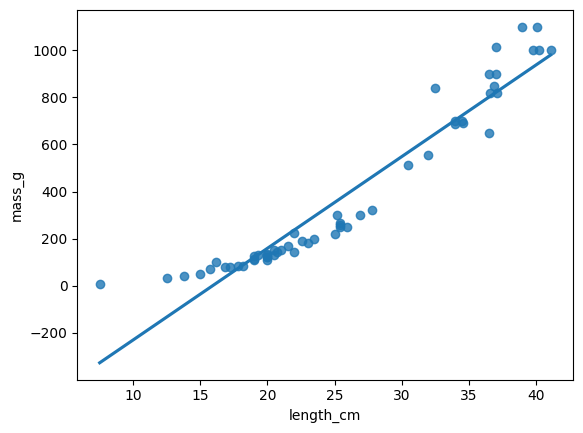

In [23]:
#Visualizing
x='length_cm'
y='mass_g'

sns.regplot(x='length_cm',y='mass_g',data=perch,ci=None)
plt.show()

from the plot, lenght seems not to have a good linear relationship with the mass..cause as the perch fish grows..it gets fatter and longer as well

In [26]:
#plotting mass * lenght cubed

perch.loc[:, 'length_cm_cubed'] = fish.loc[perch.index, 'length_cm'].copy() ** 3
print(perch.head())

   species  mass_g  length_cm  length_cm_cubed
55   Perch     5.9        7.5          421.875
56   Perch    32.0       12.5         1953.125
57   Perch    40.0       13.8         2628.072
58   Perch    51.5       15.0         3375.000
59   Perch    70.0       15.7         3869.893


<ipython-input-26-5b3b27116742>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch.loc[:, 'length_cm_cubed'] = fish.loc[perch.index, 'length_cm'].copy() ** 3


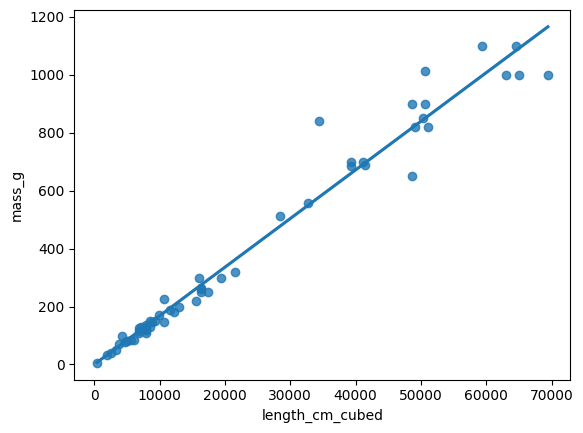

In [27]:
sns.regplot(x='length_cm_cubed',y='mass_g',data=perch,ci=None)
plt.show()

The data are much fitted on the trrendline so we good to go

In [29]:
#Model
lenght_cubed_vs_mass = ols('mass_g ~ length_cm_cubed', data=perch).fit()
print(lenght_cubed_vs_mass.params)

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64


In [33]:
#explanatory data
explanatory_data = pd.DataFrame({'length_cm_cubed': np.arange(10,41,5) ** 3,
                                 'length_cm': np.arange(10,41,5)})

In [34]:
prediction = explanatory_data.assign(mass_g = lenght_cubed_vs_mass.predict(explanatory_data))
print(prediction)

   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


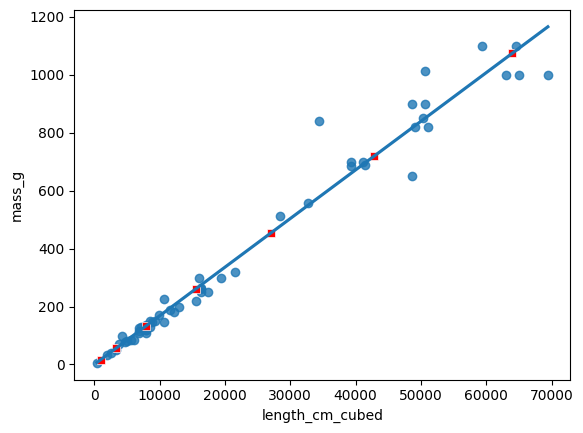

In [35]:
#visualize
fig = plt.figure()
sns.regplot(x='length_cm_cubed', y='mass_g',data=perch,ci=None)
sns.scatterplot(x='length_cm_cubed',y='mass_g',data=prediction, color = 'red',marker='s')
plt.show()